In [1]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
pip install strawberryfields --upgrade

Requirement already up-to-date: strawberryfields in c:\users\supratim sengupta\appdata\roaming\python\python38\site-packages (0.23.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
def generateProg():
    prog = sf.Program(1)
    with prog.context as q:
            #Vac | q[0]
            #Squeeze Gate
            #Sgate(1) | q[0]
            #Displacement Gate
            d = Dgate(1) #z = Re^{iq} q is angle
            d | q[0]
            #Rgate(np.pi) | q[0] #Rotation Gate
            #gamma = 2 #Cubic Phase Gate
            #Vgate(gamma) | q[0]
            kappa = 20#Kerr Gate
            Kgate(kappa) | q[0] #Swirls Probability and Mixes it w/ Origin
    eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
    state = eng.run(prog).state
    return state

In [3]:
def drawState(state):
    fig = plt.figure()
    X = np.linspace(-5, 5, 100)
    P = np.linspace(-5, 5, 100)
    Z = state.wigner(0, X, P)
    X, P = np.meshgrid(X, P)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
    fig.set_size_inches(4.8, 5)
    ax.set_axis_off()

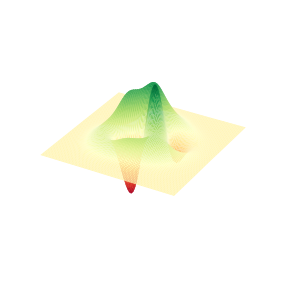

In [7]:
circ=generateProg()
drawState(circ)

In [8]:
def generateProg():
    prog = sf.Program(1)
    with prog.context as q:
            #Vac | q[0]
            Fock(5) | q[0]
    eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})
    state = eng.run(prog).state
    return state

In [9]:
def drawState(state):
    fig = plt.figure()
    X = np.linspace(-5, 5, 100)
    P = np.linspace(-5, 5, 100)
    Z = state.wigner(0, X, P)
    X, P = np.meshgrid(X, P)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
    fig.set_size_inches(4.8, 5)
    ax.set_axis_off()

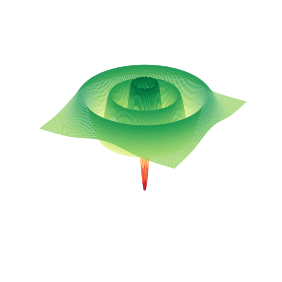

In [10]:
circ = generateProg()
drawState(circ)

In [11]:
def generateProg():
    # initialise backend, engine and register
    sf.hbar = 0.5
    prog = sf.Program(4)
    eng = sf.Engine("fock", backend_options={'cutoff_dim': 5})

    with prog.context as q:
        Sgate(1, 0) | q[3]
        Rgate(0.06283) | q[3]
        Sgate(1, 0) | q[2]
        Rgate(2.061) | q[2]
        BSgate(0.06283, 0.5152) | (q[2], q[3])
        Sgate(1, 0) | q[1]
        Rgate(-1.979) | q[1]
        Sgate(1, 0) | q[0]
        Rgate(0.5718) | q[0]
        BSgate(4.901, 5.391) | (q[0], q[1])
        BSgate(0.4712, 0.1131) | (q[1], q[2])
        BSgate(0.5592, 0.1508) | (q[0], q[1])
        BSgate(0.1319, 0.9927) | (q[2], q[3])
        BSgate(0.3079, 0.3204) | (q[1], q[2])
        BSgate(0.4335, 0.6095) | (q[2], q[3])
        BSgate(0.4335, 0.0754) | (q[0], q[1])

    results = eng.run(prog).state
    return results

In [12]:
def drawState(state):
    fig = plt.figure()
    X = np.linspace(-5, 5, 100)
    P = np.linspace(-5, 5, 100)
    Z = state.wigner(0, X, P)
    X, P = np.meshgrid(X, P)
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
    fig.set_size_inches(4.8, 5)
    ax.set_axis_off()

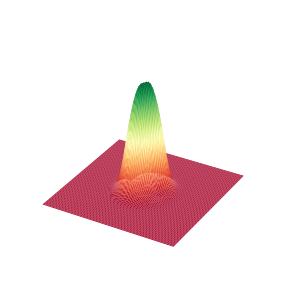

In [13]:
circ = generateProg()
drawState(circ)